In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alejopaullier/aminoacids-physical-and-chemical-properties")

print("Path to dataset files:", path)

100%|██████████| 1.38k/1.38k [00:00<00:00, 175kB/s]

Extracting files...
Path to dataset files: C:\Users\muhammad.abubakar\.cache\kagglehub\datasets\alejopaullier\aminoacids-physical-and-chemical-properties\versions\3


#### Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('aminoacids.csv')

In [4]:
df.head()

,Name,Abbr,Letter,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pKa1,pKb2,pKx3,...,VSC,P1,P2,SASA,NCISC,carbon,hydrogen,nitrogen,oxygen,sulfur
0,Alanine,Ala,A,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,NaN,...,27.5,8.1,0.046,1.181,0.007187,3,7,1,2,0
1,Cysteine,Cys,C,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,...,44.6,5.5,0.128,1.461,-0.036610,3,7,1,2,1
2,Aspartic acid,Asp,D,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,...,40.0,13.0,0.105,1.587,-0.023820,4,7,1,4,0
3,Glutamic acid,Glu,E,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,...,62.0,12.3,0.151,1.862,0.006802,5,9,1,4,0
4,Phenylalanine,Phe,F,165.19,C9H11NO2,C9H9NO,147.18,1.83,9.13,NaN,...,115.5,5.2,0.290,2.228,0.037552,9,11,1,2,0


#### Step 1: Load and Inspect the Data

In [5]:
# Display basic info
basic_info = df.info()

# Display first few rows
head_data = df.head()

# Check missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

basic_info, head_data, missing_values, summary_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               22 non-null     object 
 1   Abbr               22 non-null     object 
 2   Letter             22 non-null     object 
 3   Molecular Weight   22 non-null     float64
 4   Molecular Formula  22 non-null     object 
 5   Residue Formula    22 non-null     object 
 6   Residue Weight     22 non-null     float64
 7   pKa1               21 non-null     float64
 8   pKb2               21 non-null     float64
 9   pKx3               7 non-null      float64
 10  pl4                21 non-null     float64
 11  H                  20 non-null     float64
 12  VSC                20 non-null     float64
 13  P1                 20 non-null     float64
 14  P2                 20 non-null     float64
 15  SASA               20 non-null     float64
 16  NCISC              20 non-nu

(None,
             Name Abbr Letter  Molecular Weight Molecular Formula  \
 0        Alanine  Ala      A             89.10           C3H7NO2   
 1       Cysteine  Cys      C            121.16          C3H7NO2S   
 2  Aspartic acid  Asp      D            133.11           C4H7NO4   
 3  Glutamic acid  Glu      E            147.13           C5H9NO4   
 4  Phenylalanine  Phe      F            165.19          C9H11NO2   
 
   Residue Formula  Residue Weight  pKa1   pKb2  pKx3  ...    VSC    P1     P2  \
 0          C3H5NO           71.08  2.34   9.69   NaN  ...   27.5   8.1  0.046   
 1         C3H5NOS          103.15  1.96  10.28  8.18  ...   44.6   5.5  0.128   
 2         C4H5NO3          115.09  1.88   9.60  3.65  ...   40.0  13.0  0.105   
 3         C5H7NO3          129.12  2.19   9.67  4.25  ...   62.0  12.3  0.151   
 4          C9H9NO          147.18  1.83   9.13   NaN  ...  115.5   5.2  0.290   
 
     SASA     NCISC  carbon  hydrogen  nitrogen  oxygen  sulfur  
 0  1.181  0.0071

#### Step 2: Exploratory Data Analysis (EDA)

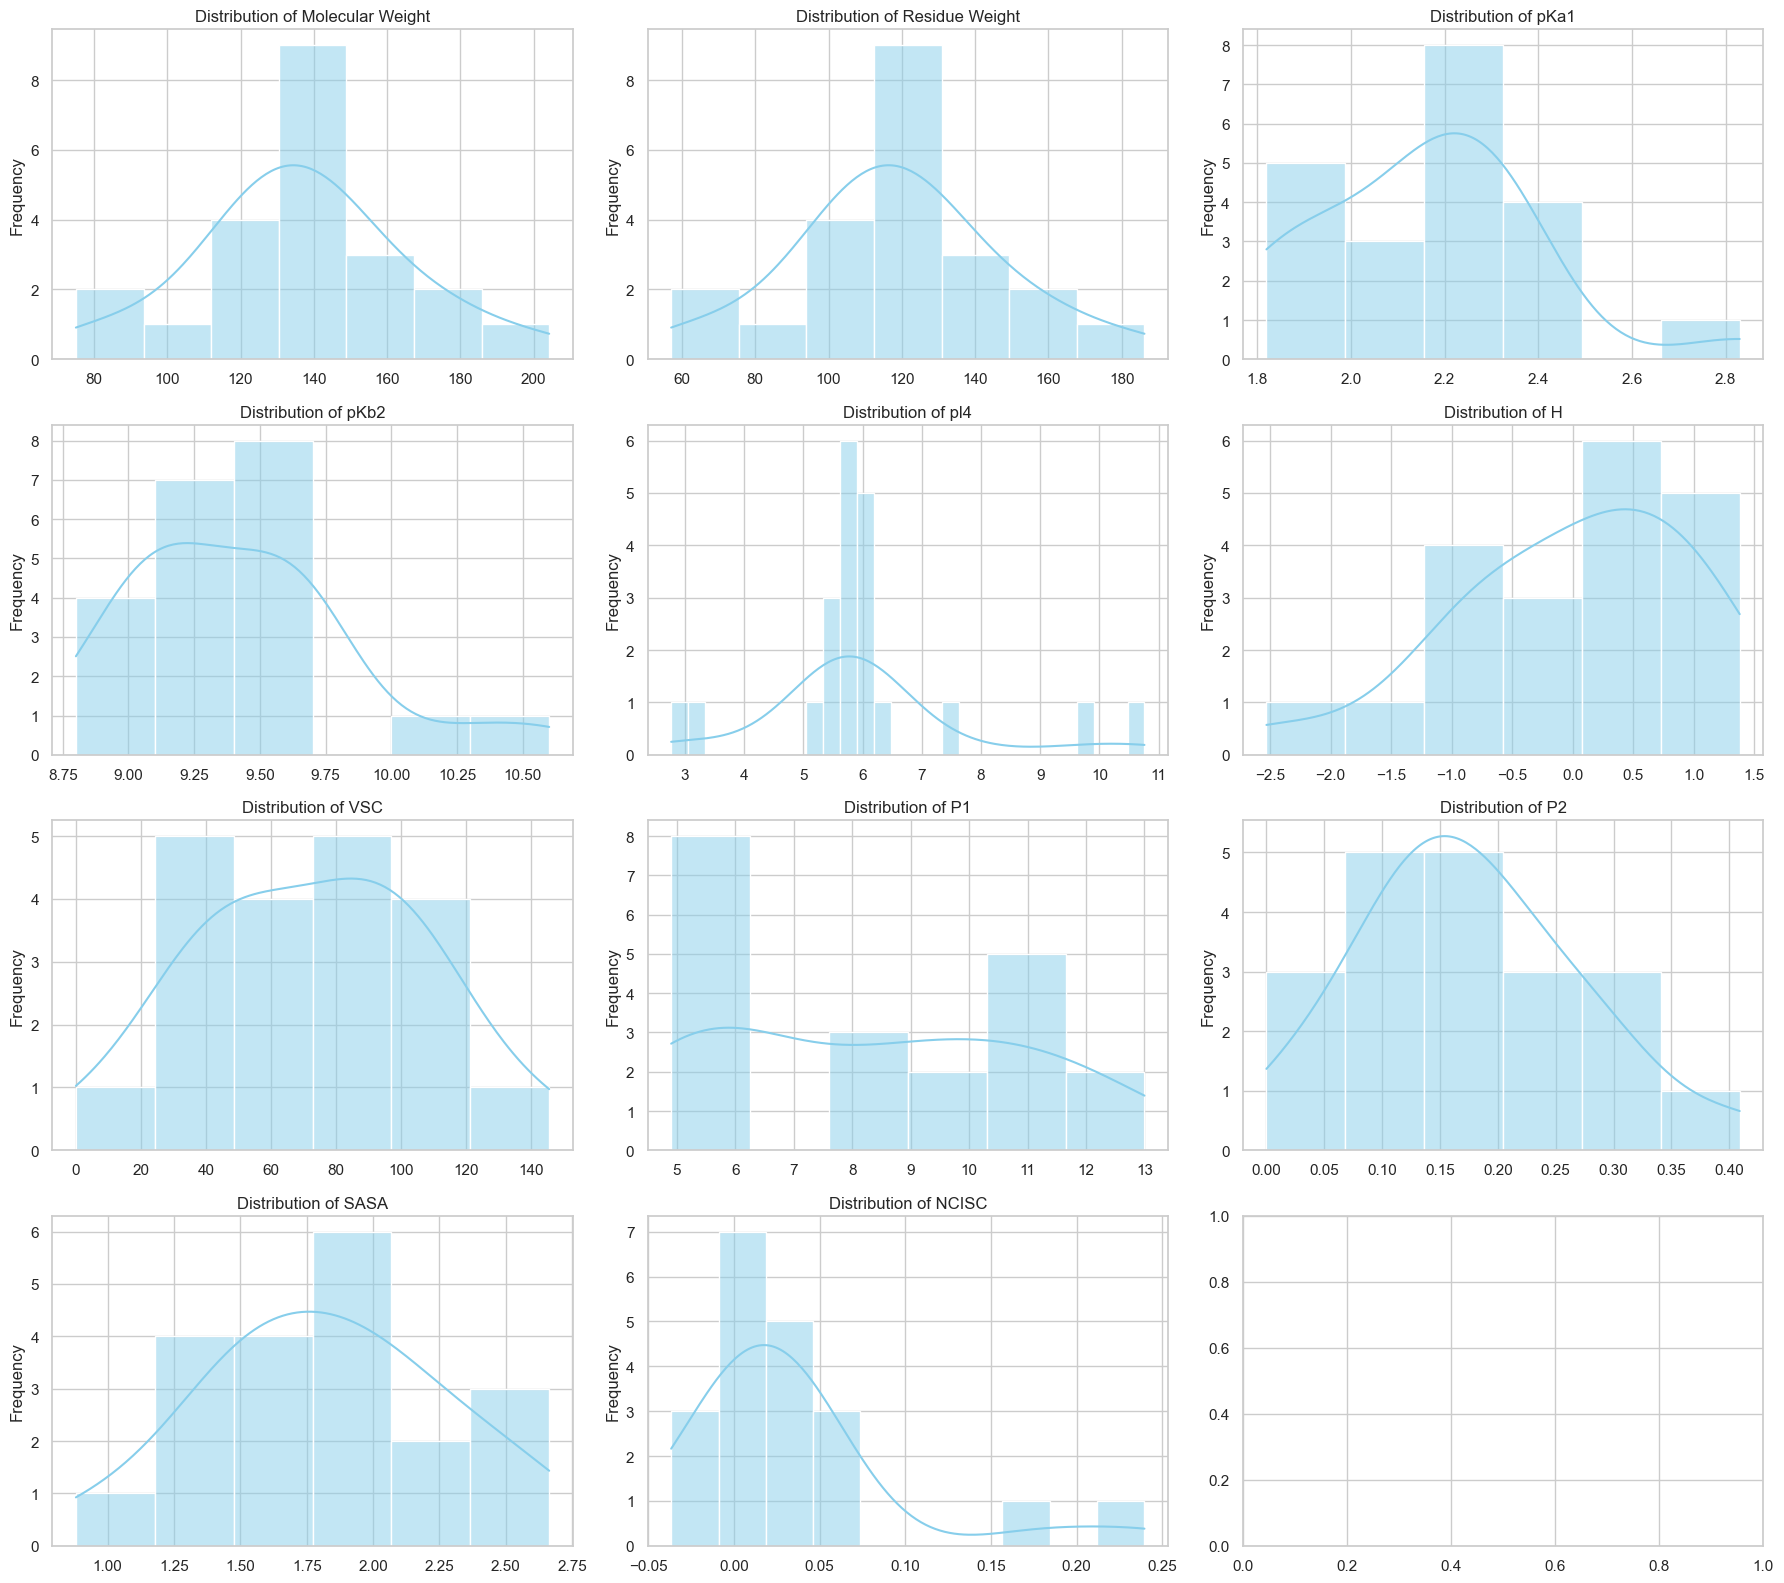

In [6]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution plots of key numerical features
numerical_columns = ['Molecular Weight', 'Residue Weight', 'pKa1', 'pKb2', 'pl4', 'H', 'VSC', 'P1', 'P2', 'SASA', 'NCISC']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Step 3: Correlation Heatmap

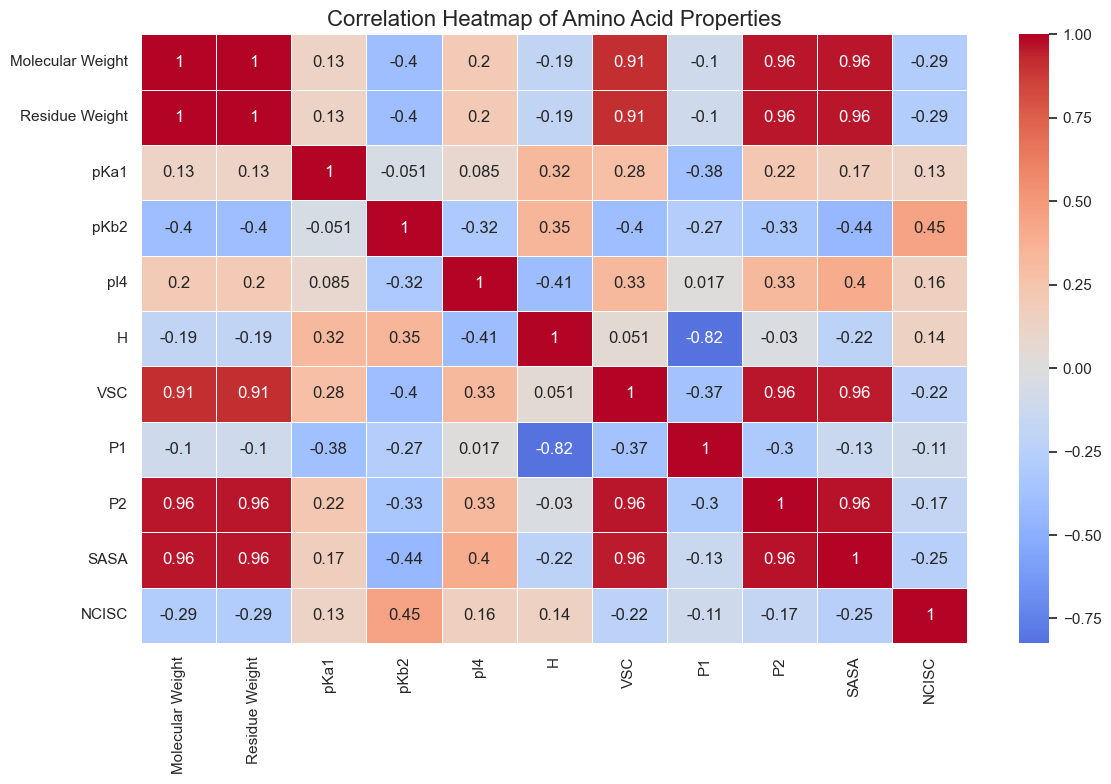

In [7]:
# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Amino Acid Properties", fontsize=16)
plt.tight_layout()
plt.show()


#### Step 4: Predict Hydrophobicity with Linear Regression

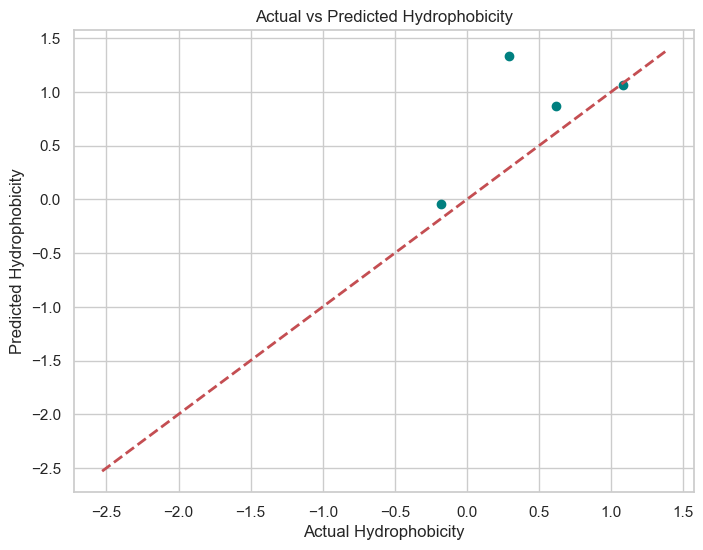

Mean Absolute Error (MAE): 0.362
R² Score: -0.394


In [8]:
# Drop rows with missing values
df_clean = df[numerical_columns].dropna()

# Define features and target
X = df_clean.drop(columns=['H'])
y = df_clean['H']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Hydrophobicity')
plt.ylabel('Predicted Hydrophobicity')
plt.title('Actual vs Predicted Hydrophobicity')
plt.grid(True)
plt.show()

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


#### Step 5: Visualize relationships with Hydrophobicity (H)

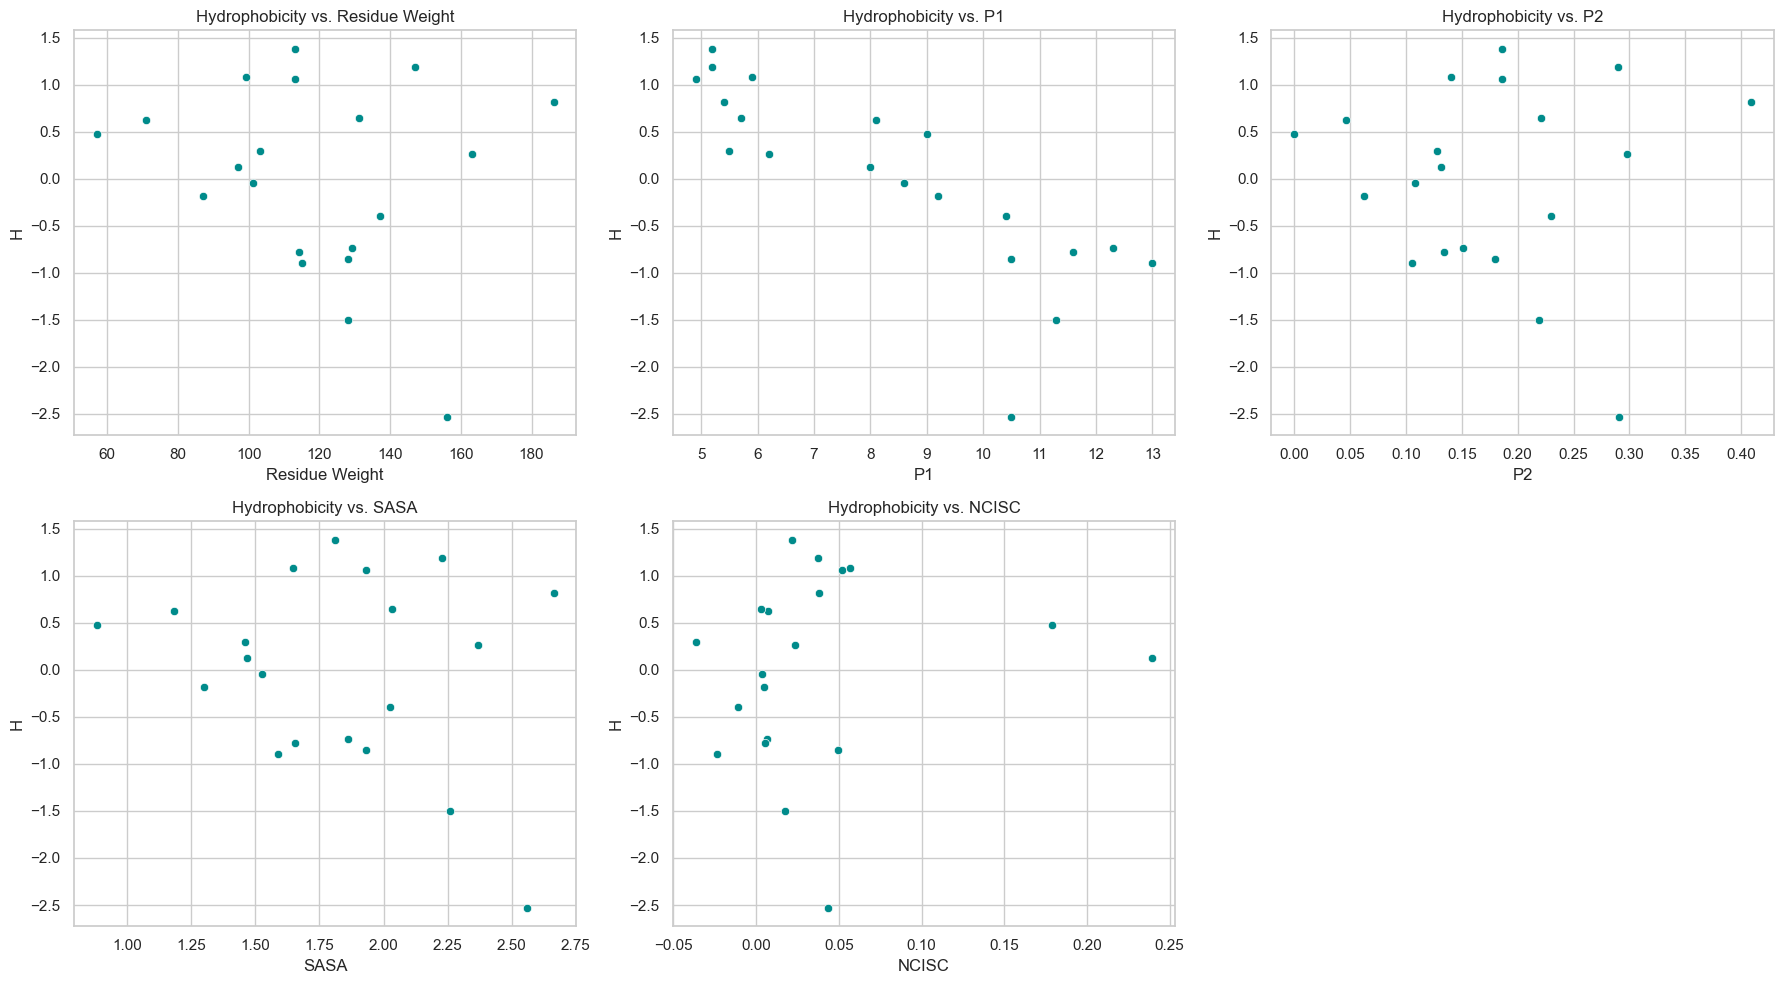

In [9]:
# Select interesting features
features_to_plot = ['Residue Weight', 'P1', 'P2', 'SASA', 'NCISC']

# Plot scatter plots vs. Hydrophobicity
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    sns.scatterplot(data=df, x=feature, y='H', ax=axes[idx], color='darkcyan')
    axes[idx].set_title(f'Hydrophobicity vs. {feature}')
    axes[idx].grid(True)

# Remove the last empty subplot (if only 5 plots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


What We Observe from the Visualizations:
1. Hydrophobicity vs. Polarity (P1)
This is the clearest inverse relationship.

As polarity increases, hydrophobicity tends to decrease.

Strong candidate feature for modeling.

2. Hydrophobicity vs. Net Charge (NCISC)
Appears somewhat clustered, especially near zero charge.

Suggests charge-neutral amino acids span a wide range of hydrophobicity.

3. Other Plots (Residue Weight, P2, SASA)
No obvious linear relationship.

Possibly non-linear or interacting features.

#### Step 6: Train a Random Forest Model (Non Linear model)

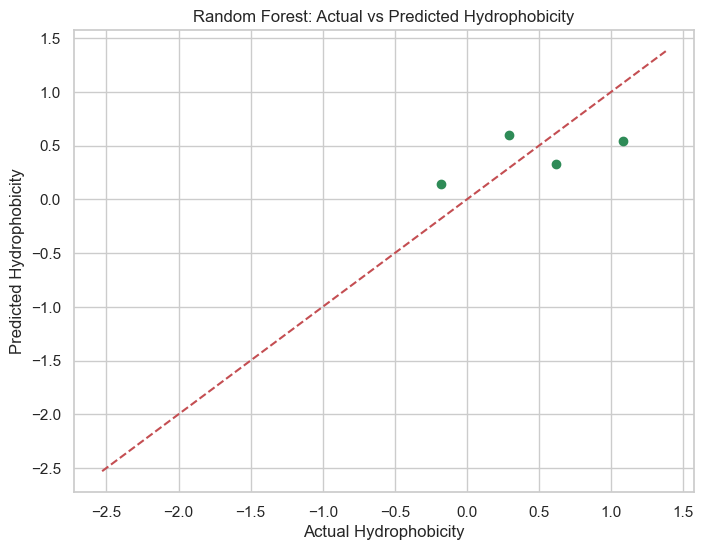

Random Forest MAE: 0.365
Random Forest R²: 0.326


In [10]:
# Clean and prepare data
df_clean = df[numerical_columns].dropna()
X = df_clean.drop(columns=['H'])
y = df_clean['H']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='seagreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Hydrophobicity')
plt.ylabel('Predicted Hydrophobicity')
plt.title('Random Forest: Actual vs Predicted Hydrophobicity')
plt.grid(True)
plt.show()

print(f"Random Forest MAE: {mae_rf:.3f}")
print(f"Random Forest R²: {r2_rf:.3f}")

MAE: 0.365
➤ About the same as the linear model (0.362)
➤ Still ~0.36 units off on average

R²: 0.326
➤ Big improvement from the linear model's -0.394
➤ Explains ~32.6% of the variance in hydrophobicity
➤ Suggests that non-linear relationships exist in the data!

### improvement

#### Libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

In [14]:
# 1. Load dataset
df = pd.read_csv("aminoacids.csv")  # Replace with actual file path or name

# 2. Define features and target
X = df.drop(columns=["Name", "Abbr", "Letter", "H", "Molecular Formula", "Residue Formula"])  # drop non-numeric
y = df["H"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using mean imputation as SVR model cant handle nan values ad we have nan values in our data

In [21]:
# Combine features and target into one DataFrame temporarily
data = df.drop(columns=["Name", "Abbr", "Letter", "Molecular Formula", "Residue Formula"])
data = data.dropna(subset=["H"])  # Drop rows where H (target) is missing

# Now split again
X = data.drop(columns=["H"])
y = data["H"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [22]:
# 1. Initialize SVR model (with RBF kernel)
svr = SVR(kernel='rbf', C=1.0, gamma='scale')

# 2. Train the model
svr.fit(X_train_scaled, y_train)

# 3. Predict on test data
y_pred_svr = svr.predict(X_test_scaled)

# 4. Evaluate performance
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR MAE: {mae_svr:.3f}")
print(f"SVR R²: {r2_svr:.3f}")


SVR MAE: 0.224
SVR R²: 0.699


This is a huge improvement as 
Support Vector Regression (SVR) model:
MAE improved from ~0.365 → 0.224
R² improved from ~0.326 → 0.699

This model now explains ~70% of the variance in hydrophobicity based on amino acid properties — that’s strong for such a small dataset.
This confirms that non-linear modeling with SVR is a much better fit here than Random Forest.

Now to further improve it we are using Hyperparameter tuning with GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the SVR model
svr = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='r2',          # R² score
    n_jobs=-1,             # Use all cores
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R² Score:", grid_search.best_score_)

# Predict using best model
best_svr = grid_search.best_estimator_
y_pred_best = best_svr.predict(X_test_scaled)

# Evaluate on test set
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned SVR MAE: {mae_best:.3f}")
print(f"Tuned SVR R²: {r2_best:.3f}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validated R² Score: 0.7272565323316394
Tuned SVR MAE: 0.167
Tuned SVR R²: 0.779


This means:
You allow the model some flexibility (C = 10).
You're controlling overfitting well (gamma = 0.01).
RBF kernel fits your non-linear relationship best.

#### Actual vs Predicted Plot

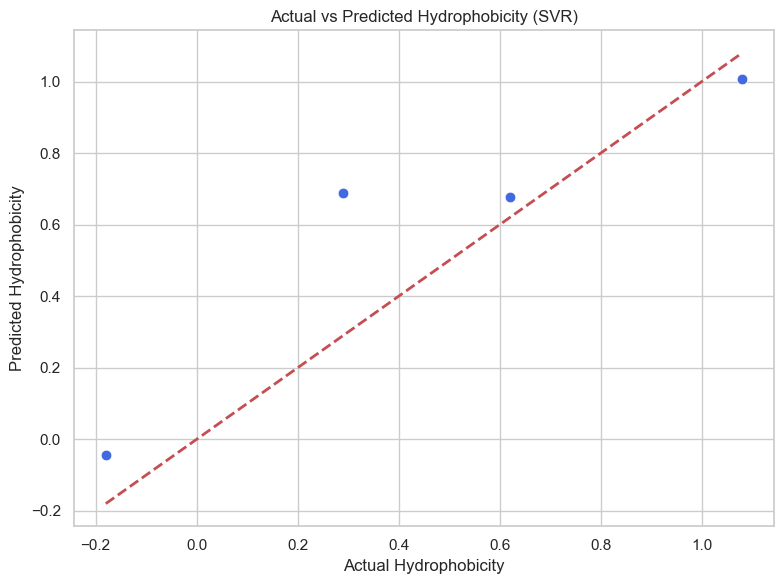

In [31]:
# Set style
sns.set(style="whitegrid")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color='royalblue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Hydrophobicity")
plt.ylabel("Predicted Hydrophobicity")
plt.title("Actual vs Predicted Hydrophobicity (SVR)")
plt.tight_layout()
plt.show()


#### Residual Plot

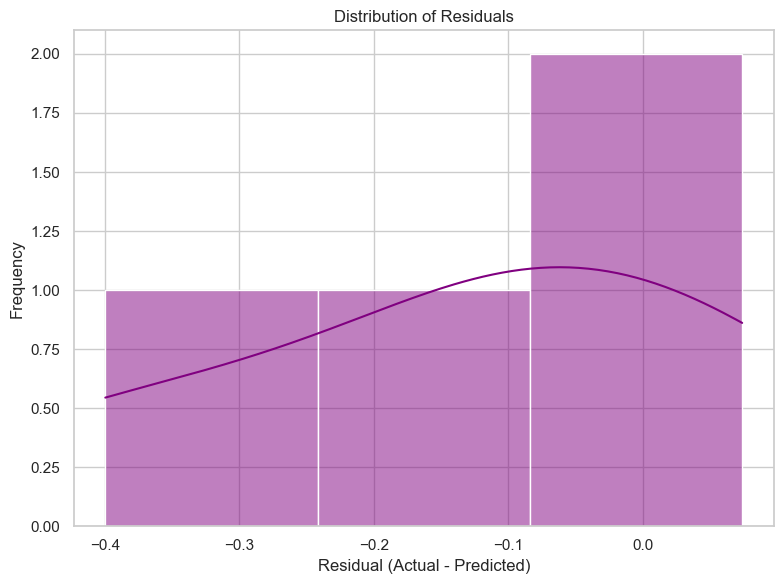

In [32]:
# Residuals = actual - predicted
residuals = y_test - y_pred_best

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### Permutation Feature Importance (for SVR)

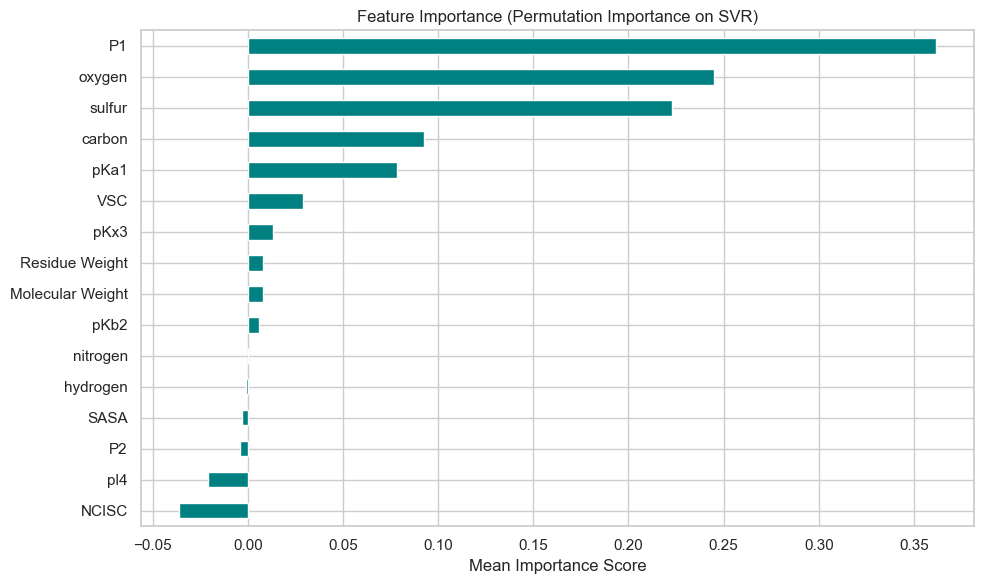

In [35]:
# Get importance using permutation method
result = permutation_importance(best_svr, X_test_scaled, y_test, n_repeats=30, random_state=42, scoring='r2')

# Match to feature names
feature_names = X.columns
importances = pd.Series(result.importances_mean, index=feature_names)

# Plot
plt.figure(figsize=(10, 6))
importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Feature Importance (Permutation Importance on SVR)")
plt.xlabel("Mean Importance Score")
plt.tight_layout()
plt.show()
